In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

**Preparing the data**

 begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [5]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm

TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos xxmaj the views of xxmaj earth that are claimed in this film to have been faked by xxup nasa have recently been compared with the historical weather data for the time of xxmaj xxunk 11 , and show a good match between the cloud patterns in the video sequence and the actual xxunk records on the day . 
 
  xxmaj this would seem to undermine the entire argument put forward in the film that the " whole xxmaj earth " picture is actually a small part of the planet xxunk by the xxunk window . 
 
  i am waiting for xxmaj bart xxmaj sibrel to now claim that the historical weather data has been faked by xxup nasa , though that would no doubt involve them in also replacing every xxunk newspaper copy with a weather map , and the ones in private hands would still be a problem . 
 
  xxmaj ah , a response : " xxmaj trying to xxunk this movie by xxunk to xxup nasa weather data i 'd say is a charming , but weak and xxunk argument . xxma

**NOTE**

By executing this line a process was launched that took a bit of time. 
Lets dig a bit into it. Images could be fed (almost) directly into a model
 because they are just a big array of pixel values that are floats between 0 and 1.
  A text is composed of words, and we can not apply mathematical functions to them directly.
   We first have to convert them to numbers.
 This is done in two differents steps: tokenization and numericalization.
  A TextDataBunch does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [0]:
data_lm.save()

**NOTE**
Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [0]:
data = load_data(path)

In [0]:
path

PosixPath('/root/.fastai/data/imdb_sample')

**Tokenization**

In [6]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')


In [0]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


**NOTE** 
    Compare above TextClassDataBunch with TextDataBunch

**Numericalization**

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token UNK.

The correspondance from ids to tokens is stored in the vocab attribute of our datasets, in a dictionary called itos (for int to string).

In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [0]:
data.train_ds[0][0]

Text xxbos xxmaj one does n't get to enjoy this gem , the 1936 xxmaj invisible xxmaj ray , often . xxmaj but no can forget it . xxmaj the story is elegant . xxmaj karloff , xxunk and xxunk in his xxmaj xxunk mountain retreat , is xxmaj janos xxmaj rukh , genius science who reads ancient beams of light to xxunk events in the great geological past 
 particularly the crash of a xxunk xxunk meteor in xxmaj africa . xxmaj xxunk him is the ever - elegant xxmaj lugosi ( as a rare hero ) , who studies " astro - chemistry . " xxmaj frances xxmaj drake is the lovely , xxunk young wife ; xxmaj frank xxmaj lawton the romantic temptation ; and the xxunk xxmaj violet xxmaj xxunk xxmaj cooper is xxmaj mother xxmaj rukh , in a performance worthy of xxmaj maria xxmaj xxunk . 
 
  xxmaj the story moves swiftly in bold episodes , with special effects that are still handsome . xxmaj it also contains some wonderful lines . xxmaj one xxmaj rukh restores his mother 's sight , he asks , " xxmaj mother , can y

In [0]:
data.train_ds[0][1]

Category positive

In [0]:
data.train_ds[0][0].data[:10]

array([   2,    5,   44,   96,   37,  104,   15,  418,   21, 2475])

**With DataBlock API**

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

In [4]:
data2 = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

NameError: ignored

In [0]:
data2.show_batch

<bound method DataBunch.show_batch of TextClasDataBunch;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj

**Language Model**

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs=48

Now let's grab the full dataset for what follows.

In [6]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

**NOTE**
 The reviews are in a training and test set following an imagenet structure. USED TO MAKE TEXT LIST FROM FOLDERS BELOW

**WikiText 103 Transfer Learning**

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called wikitext-103). That model has been trained to guess what the next word is, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

**NOTE**

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [7]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_model_store_path = Path ( '/content/gdrive/My Drive/saved_models/NLP/IMDB_sentiment/data_models' )

In [9]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

data_lm.path = data_model_store_path
data_lm.save('data_lm.pkl')

We have to use a special kind of TextDataBunch for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

In [0]:
data_lm = load_data(data_model_store_path, 'data_lm.pkl', bs=bs)

In [11]:
data_lm.show_batch()

idx,text
0,life outside of the job that you can believe . xxmaj the dialog is better than good ... it 's great ! xxmaj the fashion is good and i really like all the characters . xxmaj the story line is better than xxmaj sex in the xxmaj city because the character are much more realistic . xxmaj there must be a season 3 in production . i hope the network
1,"name on a small ( figuratively speaking ) movie in efforts to grab some cash and did so without any regard for how it would effect the finished product . \n \n xxmaj this film is awful , make no mistake - but had it not set people up to see a remake of a classic it may have passed at least as a mildly entertaining failure as opposed"
2,"has nothing to do with the movie , i think overall it 's a better title than xxup haunts . because haunts promises ghosts or demons or something . xxmaj veil promises ... well , a veil . and if there 's no veil , i 'm not nearly as disappointed . \n \n xxmaj so yeah , another boring 70 's movie . xxmaj not nearly as painful"
3,"you 'll be thinking "" xxmaj okay , someone either needs to get shot or this movie needs to end . "" xxbos xxmaj judy xxmaj berlin is a blah story about blah people living their ever so blah lives . xxmaj blah , blah , blah . xxmaj eric xxmaj mendelsohn , a former assistant to xxmaj woody xxmaj allen and an obvious xxmaj woody wannabe , wrote and"
4,"to remake people 's innermost selves . xxup but xxrep 7 . as a viewer you should remain aware that , in the end , such a goal is not going to be successful . xxmaj still , there will be cases / instances of supposedly successful personality change presented in order to convince us otherwise ( just know that if personality alterations are brought about , they will be"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in ~/.fastai/models/ (or elsewhere if you specified different paths in your config file).

In [12]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


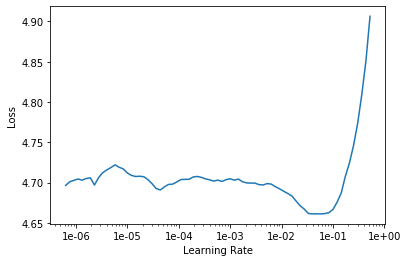

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learner_model_store_path = Path ( '/content/gdrive/My Drive/saved_models/NLP/IMDB_sentiment/learner_models/' )

In [0]:
learner_model_name = 'fit_head'

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

# You should save each model in a separate folder if you are not having unique name for each of ur saved model
# You should not save your model with simple learn.save('xx') without first deciding the directory 
# i.e path where model is to be saved
learn.path = learner_model_store_path

learn.save(learn_model_name)

epoch,train_loss,valid_loss,accuracy,time
0,4.154210,4.021998,0.295782,1:35:09


In [0]:
learner_model_load_path = Path ( '/content/gdrive/My Drive/saved_models/NLP/IMDB_sentiment/learner_models/'+learn_model_name )

In [0]:
learn.load( learner_model_load_path);

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()

In [0]:
def fit_and_save_p_ncycle(name, n,lr,momsl, momsh):
  count = 0
  while count<n:
    learn.fit_one_cycle(1, lr, moms=(momsl,momsh))
    learn.save(learn_model_name)
    count= count+1
    
  

In [35]:
fit_and_save_p_ncycle(name=learner_model_name, n=10, lr=1e-3, momsl=0.8,momsh=0.7)
# learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.108833,4.029796,0.311242,27:08


epoch,train_loss,valid_loss,accuracy,time
0,3.947149,3.882180,0.323439,27:04


epoch,train_loss,valid_loss,accuracy,time
0,3.829929,3.812563,0.329429,26:47


epoch,train_loss,valid_loss,accuracy,time
0,3.754639,3.770607,0.333116,26:46


epoch,train_loss,valid_loss,accuracy,time
0,3.727006,3.743328,0.335404,26:59


epoch,train_loss,valid_loss,accuracy,time
0,3.703452,3.723338,0.336981,26:52


epoch,train_loss,valid_loss,accuracy,time
0,3.689594,3.708471,0.338270,26:49


epoch,train_loss,valid_loss,accuracy,time
0,3.630115,3.696152,0.339162,26:47


epoch,train_loss,valid_loss,accuracy,time
0,3.635322,3.686332,0.339912,26:48


epoch,train_loss,valid_loss,accuracy,time
0,3.621766,3.678190,0.340389,26:47


In [0]:
learn.load(learner_model_load_path);

Predictions

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [41]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because as a movie about their shown , and then it kelly to the until ending as a word black / Wanted Man Imamura . It 's a down movie that hearing some of the most reporter
I liked this movie because in citizens . i had happens this actually . It 's an beautiful movie . The Nice movies are just state leading , and the poorly is door . i 'm not day what 's going on


**NOTE**
We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

**CLASSIFIER**

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
path = untar_data(URLs.IMDB)

In [44]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.path = Path ( '/content/gdrive/My Drive/saved_models/NLP/IMDB_sentiment/data_models' )
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(data_model_store_path , 'data_clas.pkl', bs=bs)

In [47]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg
"xxbos xxmaj jim xxmaj carrey is back to much the same role that he played in xxmaj the xxmaj mask , a timid guy who is trying to get ahead in the world but who seems to be plagued with bad luck . xxmaj even when he tries to help a homeless guy from being harassed by a bunch of hoodlums ( and of course they have to be xxmaj",pos
"xxbos xxmaj chris xxmaj rock deserves better than he gives himself in "" xxmaj down xxmaj to xxmaj earth . "" xxmaj as directed by brothers xxmaj chris & xxmaj paul xxmaj weitz of "" xxmaj american xxmaj pie "" fame , this uninspired remake of xxmaj warren xxmaj beatty 's 1978 fantasy "" xxmaj heaven xxmaj can xxmaj wait , "" itself a rehash of 1941 's "" xxmaj",neg
"xxbos xxmaj that word ' xxmaj true ' in this film 's title got my alarm bells ringing . xxmaj they rang louder when a title card referred to xxmaj america 's xxmaj civil xxmaj war as the ' xxmaj war xxmaj between the xxmaj states ' ( the xxunk preferred by die - hard southerners ) . xxmaj jesse xxmaj james -- thief , slave - holder and murderer",neg


**We can then create a model to classify those reviews and load the encoder we saved before.**

In [48]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj this is the worst adaption of a classic story i have ever seen . xxmaj they needlessly modernize it and some points are actually just sick . 
 
  xxmaj the songs rarely move along the story . xxmaj they seem to be thrown in at random . xxmaj the flying scene with xxmaj marley is pointless and ludicrous . 
 
  xxmaj it 's not only one of the worst movies i 've seen , but it is definitely the worst musical i 've ever seen . 
 
  xxmaj it 's probably only considered a classic because " a xxmaj christmas xxmaj carol " is such a classic story . xxmaj just because the original story was a classic does n't mean that some cheap adaption is .,xxbos xxmaj wow and i thought that any xxmaj steven xxmaj segal movie was bad . xxmaj every time i thought that the movie could n't get worse it proved me wrong . xxmaj the story was good but the actors could n't carry it off . xxmaj also , they made a lot of mistake

In [49]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


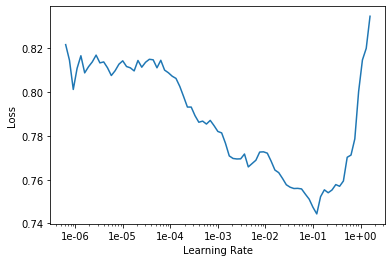

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.609524,0.553286,0.722840,02:54


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [54]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.496839,0.430830,0.799560,03:41


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [57]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.377908,0.331525,0.853720,04:45


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [60]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.332683,0.299521,0.871320,06:32
1,0.293280,0.287520,0.879440,05:19


In [0]:
learn.save('fourth')

In [61]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([0.0014, 0.9986]))